In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import shutil

# # Define the path to the folder
# folder_path = "/content/Dataset"

# Delete the folder and all its contents
shutil.rmtree(folder_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Dataset'

In [6]:
!git clone https://github.com/I-Am-Timothy-Williams/scoliosis-detection.git



Cloning into 'scoliosis-detection'...
remote: Enumerating objects: 2099, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 2099 (delta 8), reused 25 (delta 4), pack-reused 2060 (from 1)
Receiving objects: 100% (2099/2099), 84.52 MiB | 34.77 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [7]:
!mkdir /content/Dataset


In [8]:
import os
import shutil

# Define paths to scoliosis and normal images
# scoliosis_path_227 = 'scoliosis-detection/Spine X-Rays/ImagesOriginalSize/Scol'
scoliosis_path = 'scoliosis-detection/Spine X-Rays/ImagesOriginalSize/ScolFinal'
# normal_path_227 = 'scoliosis-detection/Spine X-Rays/227/227/Normal'
normal_path = 'scoliosis-detection/Spine X-Rays/ImagesOriginalSize/NormalFinal'
# normal_path_256 = 'scoliosis-detection/Spine X-Rays/256/256/Normal'
# normal_path_299 = 'scoliosis-detection/Spine X-Rays/299/299/Normal'
# normal_path_331 = 'scoliosis-detection/Spine X-Rays/331/331/Normal'

# Create directories for scoliosis and normal images
os.makedirs('Dataset/Scoliosis', exist_ok=True)
os.makedirs('Dataset/Normal', exist_ok=True)

# Copy scoliosis images from 227
for img_file in os.listdir(scoliosis_path):
    shutil.copy(os.path.join(scoliosis_path, img_file), 'Dataset/Scoliosis/')

# Copy scoliosis images from 224 with unique filenames
# for img_file in os.listdir(scoliosis_path_224):
#     src_path = os.path.join(scoliosis_path_224, img_file)
#     dest_path = os.path.join('Dataset/Scoliosis1', f"224_{img_file}")  # Prefix '224_' for uniqueness
#     shutil.copy(src_path, dest_path)

# Copy normal images from 227
for img_file in os.listdir(normal_path):
    shutil.copy(os.path.join(normal_path, img_file), 'Dataset/Normal/')

# Copy normal images from 224 with unique filenames
# for img_file in os.listdir(normal_path_224):
#     src_path = os.path.join(normal_path_224, img_file)
#     dest_path = os.path.join('Dataset/Normal1', f"224_{img_file}")  # Prefix '224_' for uniqueness
#     shutil.copy(src_path, dest_path)

# Copy normal images from 256 with unique filenames
# for img_file in os.listdir(normal_path_256):
#     src_path = os.path.join(normal_path_256, img_file)
#     dest_path = os.path.join('Dataset/Normal1', f"256_{img_file}")  # Prefix '256_' for uniqueness
#     shutil.copy(src_path, dest_path)

# # Copy normal images from 299 with unique filenames
# for img_file in os.listdir(normal_path_299):
#     src_path = os.path.join(normal_path_299, img_file)
#     dest_path = os.path.join('Dataset/Normal1', f"299_{img_file}")  # Prefix '299_' for uniqueness
#     shutil.copy(src_path, dest_path)

# # Copy normal images from 331 with unique filenames
# for img_file in os.listdir(normal_path_331):
#     src_path = os.path.join(normal_path_331, img_file)
#     dest_path = os.path.join('Dataset/Normal1', f"331_{img_file}")  # Prefix '331_' for uniqueness
    # shutil.copy(src_path, dest_path)

print("Images have been organized into 'Dataset/Scoliosis' and 'Dataset/Normal' directories.")


Images have been organized into 'Dataset/Scoliosis' and 'Dataset/Normal' directories.


In [10]:
import shutil

# Define source and destination
src = "/content/drive/MyDrive/newestdata/LATESTDATA/Normal"
dst = "/content/Dataset/Normal"
# Copy folders from Google Drive to Colab's local storage
shutil.copytree(src, dst, dirs_exist_ok=True)


'/content/Dataset/Normal'

In [11]:
import shutil

# Define source and destination
src1 = "/content/drive/MyDrive/newestdata/LATESTDATA/Scoliosis"
dst1 = "/content/Dataset/Scoliosis"
# Copy folders from Google Drive to Colab's local storage
shutil.copytree(src1, dst1, dirs_exist_ok=True)


'/content/Dataset/Scoliosis'

In [15]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

# Paths
normal_dir = 'Dataset/Normal'
augment_dir = 'Dataset/Normal_Augmented'

# Ensure the augment directory exists
os.makedirs(augment_dir, exist_ok=True)

# Get the list of images in the "Normal" folder
normal_images = os.listdir(normal_dir)
num_original_normal = len(normal_images)
target_count = 358  # Match the count of "Scoliosis" images

# Set up the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Count of augmented images created
augmented_count = 0

# Augment images until we reach the target count
while num_original_normal + augmented_count < target_count:
    # Select a random image from the original "Normal" images
    img_name = random.choice(normal_images)
    img_path = os.path.join(normal_dir, img_name)

    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to model input size if needed
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Generate augmented images
    for _ in range(5):  # Increase the range if needed for more images
        augmented_img = datagen.flow(img_array, batch_size=1)[0].astype(np.uint8)[0]
        augmented_img_pil = Image.fromarray(augmented_img)

        # Save the augmented image to the augment directory
        aug_img_name = f"aug_{augmented_count}.png"
        augmented_img_pil.save(os.path.join(augment_dir, aug_img_name))
        augmented_count += 1

        # Stop if we've reached the target count
        if num_original_normal + augmented_count >= target_count:
            break

print(f"Augmentation complete. Generated {augmented_count} new images.")


Augmentation complete. Generated 100 new images.


In [17]:
import os
import shutil

# Define the folder paths
normal_folder = 'Dataset/Normal'
normal_augmented_folder = 'Dataset/Normal_Augmented'

# Get a set of all filenames in the Normal folder
existing_files = set(os.listdir(normal_folder))

# Iterate over the files in the Normal_Augmented folder
for filename in os.listdir(normal_augmented_folder):
    source_path = os.path.join(normal_augmented_folder, filename)
    destination_path = os.path.join(normal_folder, filename)

    # If a file with the same name exists, rename the new file
    if filename in existing_files:
        # Generate a unique filename by appending a number to avoid overwriting
        base, extension = os.path.splitext(filename)
        counter = 1
        while os.path.exists(destination_path):
            new_filename = f"{base}_{counter}{extension}"
            destination_path = os.path.join(normal_folder, new_filename)
            counter += 1

    # Copy the file to the Normal folder
    shutil.copy2(source_path, destination_path)

print("Files copied successfully without overwriting.")


Files copied successfully without overwriting.


In [18]:
import os

# Define the folder paths
normal_folder = 'Dataset/Normal'
scoliosis_folder = 'Dataset/Scoliosis'

# Count the number of images in each folder
num_normal_images = len([f for f in os.listdir(normal_folder) if os.path.isfile(os.path.join(normal_folder, f))])
num_scoliosis_images = len([f for f in os.listdir(scoliosis_folder) if os.path.isfile(os.path.join(scoliosis_folder, f))])

# Print the counts
print(f"Number of images in Normal folder: {num_normal_images}")
print(f"Number of images in Scoliosis folder: {num_scoliosis_images}")

Number of images in Normal folder: 358
Number of images in Scoliosis folder: 358


In [21]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Image size and Class labels
IMAGE_SIZE = (224, 224)
CLASS_NAMES = ['Normal', 'Scoliosis']

def load_images(folder):
    images = []
    labels = []

    for class_index, class_name in enumerate(CLASS_NAMES):
        class_folder = os.path.join(folder, class_name)

        if not os.path.exists(class_folder):
            print(f"Warning: {class_folder} does not exist.")
            continue

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)

            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = tf.io.read_file(img_path)
                img = tf.image.decode_image(img, channels=3)
                img = tf.image.resize(img, IMAGE_SIZE)

                images.append(img)
                labels.append(class_index)
            else:
                print(f"Skipping: {img_path}")

    return np.array(images), np.array(labels)

# Load all images and labels
x, y = load_images('Dataset')

print(f"Total Images: {len(x)}")

# Splitting 80% Train, 10% Val, 10% Test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

print("Train Images:", len(x_train))
print("Validation Images:", len(x_val))
print("Test Images:", len(x_test))


Skipping: Dataset/Normal/2.webp
Total Images: 715
Train Images: 572
Validation Images: 71
Test Images: 72


In [22]:
# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0


In [23]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(CLASS_NAMES), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights (to handle class imbalance)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),  # All unique class labels in y_train
    y=y_train  # The target labels of the training set
)

# Create a dictionary for class weights
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)

# Pass class_weights_dict into the model.fit function during training


Class weights: {0: np.float64(1.0), 1: np.float64(1.0)}


In [25]:
history = model.fit(
    x_train, y_train,
    epochs=30,  # Adjust epochs as needed
    validation_data=(x_val, y_val),
    class_weight=class_weights_dict  # Pass class weights here
)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.5182 - loss: 1.2606 - val_accuracy: 0.7465 - val_loss: 0.6233
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.7106 - loss: 0.5802 - val_accuracy: 0.6479 - val_loss: 0.6174
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.7418 - loss: 0.4889 - val_accuracy: 0.7465 - val_loss: 0.5236
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.8590 - loss: 0.3778 - val_accuracy: 0.7042 - val_loss: 0.6452
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.8431 - loss: 0.3192 - val_accuracy: 0.7465 - val_loss: 0.5064
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9142 - loss: 0.1994 - val_accuracy: 0.7324 - val_loss: 0.5362
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9360 - loss: 0.1517 - val_accuracy: 0.7606 - val_loss: 0.5867
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.9435 - loss: 0.1587 - val_accuracy: 0.7324 - val_loss:

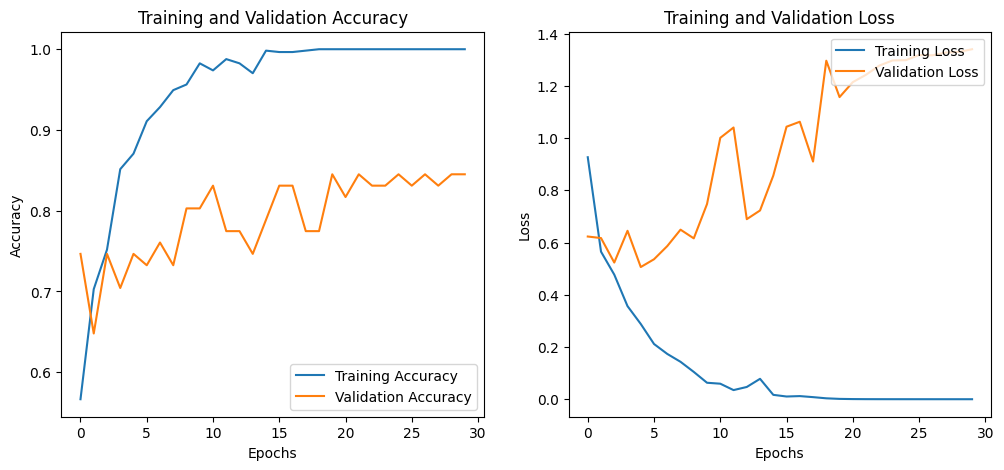

In [26]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy and loss
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot the training history
plot_training_history(history)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 581ms/step


<Figure size 800x600 with 0 Axes>

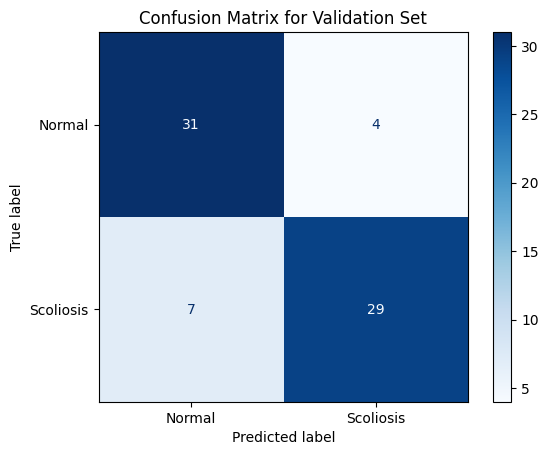

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate predictions on the validation set
y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Predicted class indices

# If y_val is not one-hot encoded, use it directly
y_val_true = y_val  # Directly use y_val if it is already integer-encoded

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=CLASS_NAMES)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix for Validation Set")
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step


<Figure size 800x600 with 0 Axes>

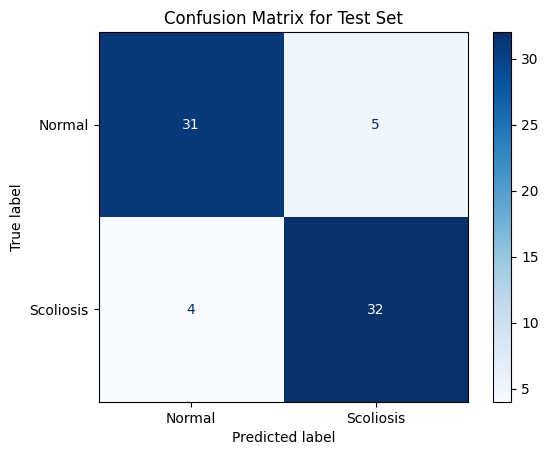

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 574ms/step - accuracy: 0.8633 - loss: 1.0002
Test Loss: 0.9535147547721863, Test Accuracy: 0.875


In [28]:
# Assuming you have a test set (x_test and y_test)
# Make predictions on the test set
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Predicted class indices

# If y_test is not one-hot encoded, use it directly
y_test_true = y_test  # Directly use y_test if it is already integer-encoded

# Compute and plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=CLASS_NAMES)
disp_test.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix for Test Set")
plt.show()

# Optionally, you can also display the accuracy and loss for the test set
# If you have the training history from model.fit, you can plot the metrics.
# Assuming 'history' is the variable that stores the model's training history.

# # Plot training and validation accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title("Training and Validation Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title("Training and Validation Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



Saving Copy of 1.jpg to Copy of 1.jpg


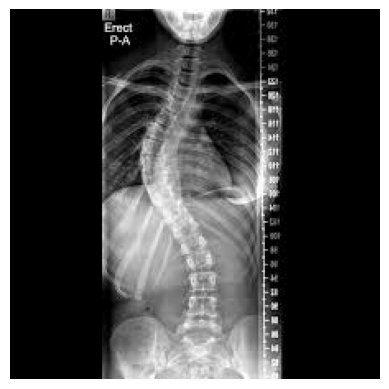

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted class: Scoliosis with confidence: 99.99%


In [29]:
from google.colab import files
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define class names
CLASS_NAMES = ['Normal', 'Scoliosis']

# Upload the image
uploaded = files.upload()

# Load the image from the uploaded file
for filename in uploaded.keys():
    # Open the image
    img_path = filename
    img = Image.open(img_path)

    # Display the uploaded image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Preprocess the image: Resize and normalize
    img = img.resize((224, 224))  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize the image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100  # Get confidence in percentage

    # Output the prediction
    print(f"Predicted class: {CLASS_NAMES[predicted_class]} with confidence: {confidence:.2f}%")


In [ ]:
# Save the model in the Keras format (.keras)
model.save('/content/lastcnn_model.keras')


In [ ]:
from google.colab import files
files.download('/content/lastcnn_model.keras')  # Replace with your saved model's path


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>